<a href="https://colab.research.google.com/github/tayfununal/hello-world/blob/master/exOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks With One Hidden Layer

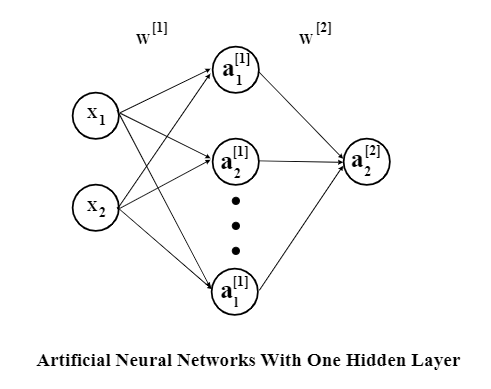

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/sample_data/XOR.csv'))
df

In [ ]:
X_input = df[['x1','x2']]
Y_output = df[['y']]

In [ ]:
x = np.array(X_input).T
y = np.array(Y_output).reshape(1,len(Y_output[['y']]))

In [ ]:
print('Shape of X : ', x.shape, '\nShape of y : ', y.shape)

In [ ]:
for i in range(len(y[0])):
  if y[0,i] == 0:
    plt.scatter(x[0,i], x[1,i], c= 'blue')
  else:
    plt.scatter(x[0,i], x[1,i], c= 'red')


In [ ]:
def initialization_parameters(x, y, num_node):
  W1 = np.random.randn(num_node * x.shape[0]).reshape(num_node, x.shape[0]) * 0.01
  b1 = np.zeros((num_node,1))

  W2 = np.random.randn(y.shape[0],num_node) * 0.01
  b2 = np.zeros((y.shape[0],1))

  assert W1.shape == (num_node,x.shape[0])
  assert b1.shape == (num_node, 1)

  assert W2.shape == (y.shape[0], num_node)
  assert b2.shape == (y.shape[0], 1)

  return W1, b1, W2, b2

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def relu(x):
  return np.maximum(0,x)

def reluDerivative(x):
  return relu(x) / np.absolute(x)

In [ ]:
def forward_prop(x, y, W1, b1, W2, b2):
  Z1 = np.dot(W1, x) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  assert Z1.shape == (W1.shape[0], x.shape[1])
  assert Z2.shape == (W2.shape[0], x.shape[1])
  cache = {
      'Z1' : Z1,
      'A1' : A1,
      'Z2' : Z2,
      'A2' : A2
  }
  return A2, cache 

In [ ]:
def cross_entropy_cost(y, A2):
  m = y.shape[1]
  
  cross_entropy = np.multiply(np.log(A2), y) + np.multiply((1 - y), np.log(1 - A2))
  cost = - np.sum(cross_entropy) / m 

  # Squeezing to avoid unnecessary dimensions 
  cost = np.squeeze(cost) 
  return cost 

In [ ]:
def backward_prop(W1, b1, W2, b2, cache, learning_rate = 0.01):
  m = y.shape[1]
  
  A1 = cache['A1']
  A2 = cache['A2']
  Z1 = cache['Z1']
  
  # Calculations of backward propagation: dW1, db1, dW2, db2
  dZ2 = A2 - y
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

  dZ1 = np.multiply(np.dot(W2.T, dZ2), reluDerivative(Z1))
  dW1 = (1 / m) * np.dot(dZ1, x.T)
  db1 = (1 / m) * np.sum(dZ1 , axis = 1, keepdims = True)

  # Updating parameters
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
   
  return W1, b1, W2, b2

In [ ]:
np.random.seed(0)
W1, b1, W2, b2 = initialization_parameters(x, y, 20)

for i in range(0, 10000):
  A2, cache = forward_prop(x, y, W1, b1, W2, b2)

  cost = cross_entropy_cost(y, A2)

  W1, b1, W2, b2 = backward_prop(W1, b1, W2, b2, cache, learning_rate = 0.01)

  if i % 1000 == 0:
    print("Cost after iteration % i : % f" %(i, cost))
